# Data Visualizations

In [1]:
# import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set max display cols/rows

# See all columns
pd.set_option('display.max_columns', None)

# See up to 200 rows
pd.set_option('display.max_rows', 200)

In [3]:
# set up imports from google drive
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# root_dir is the path to your My_Drive folder.
root_dir = "/content/drive/My Drive/"

# i'm storing the data folder in the Colab Notebooks directory at the top level of the Google Drive
data_folder = root_dir + "Colab Notebooks/MPP Science Replication Package/Data/"

# change directory to the data folder
os.chdir(data_folder)

In [5]:
# Read in data
baseline_police = pd.read_csv(data_folder + "police_baseline_all.csv")
full_police = pd.read_csv(data_folder + "police_station_merge.csv")

In [6]:
baseline_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 54 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   b_uid                                          1950 non-null   int64  
 1   gender                                         1950 non-null   object 
 2   b_pol_impt                                     1950 non-null   bool   
 3   b_thana_impt                                   1950 non-null   bool   
 4   b_wcase                                        1948 non-null   object 
 5   b_effective                                    1943 non-null   object 
 6   b_helpful                                      1947 non-null   object 
 7   b_add_officer                                  1948 non-null   object 
 8   b_add_female                                   1949 non-null   object 
 9   b_female_better                                1947 

In [7]:
full_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Columns: 149 entries, uid to female_better_change
dtypes: bool(59), float64(62), int64(8), object(20)
memory usage: 812.6+ KB


## Visualization 1: Importance of women's cases to officers by gender at baseline

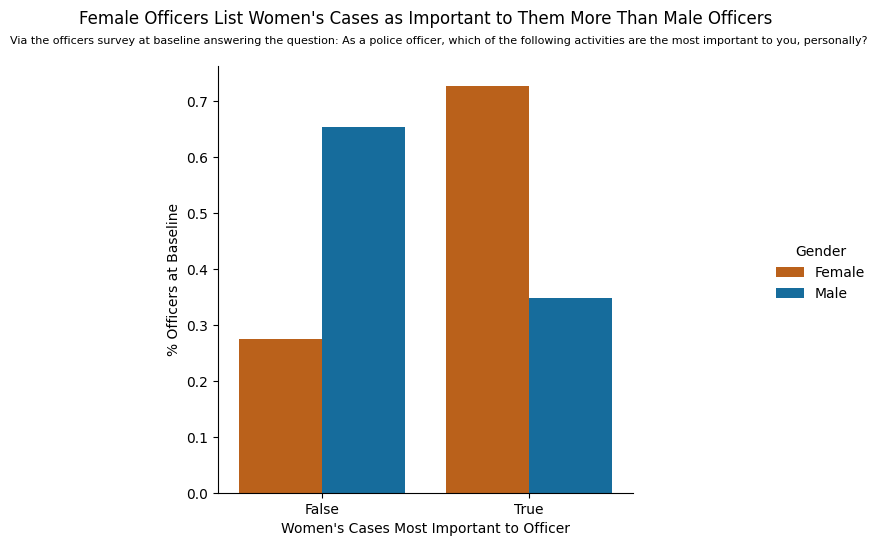

In [8]:
percents = baseline_police.groupby('gender')['b_pol_impt'].value_counts(normalize=True).reset_index()
percents['Gender']=percents['gender'].map({'m':'Male', 'f':'Female'})
g = sns.catplot(
    data=percents, kind="bar",
    x="b_pol_impt", y="proportion", hue="Gender", palette=dict(Female = '#d55e00', Male = '#0072b2') # Chose colors from colorblind palette
)
_ = plt.xlabel("Women's Cases Most Important to Officer")
_ = plt.ylabel("% Officers at Baseline")
_ = plt.title("Female Officers List Women's Cases as Important to Them More Than Male Officers", y=1.08)
_ = plt.suptitle("Via the officers survey at baseline answering the question: As a police officer, which of the following activities are the most important to you, personally?", fontsize=8, y = 1.03)
plt.show()

### Other options

One of my iterations of this chart had pink as the color for the bars for female officers. I had been going through options from the colorblind palette as I wanted to ensure the chart aligned with the accessibility ethical principle. My original thought was that pink for female would help the chart be intuitive to which bar was which gender. However, I felt like it was perpetuating gender norms and perhaps taking away from the seriousness of the topic so I decided to go with orange instead which is not stereotypically attached to either gender.

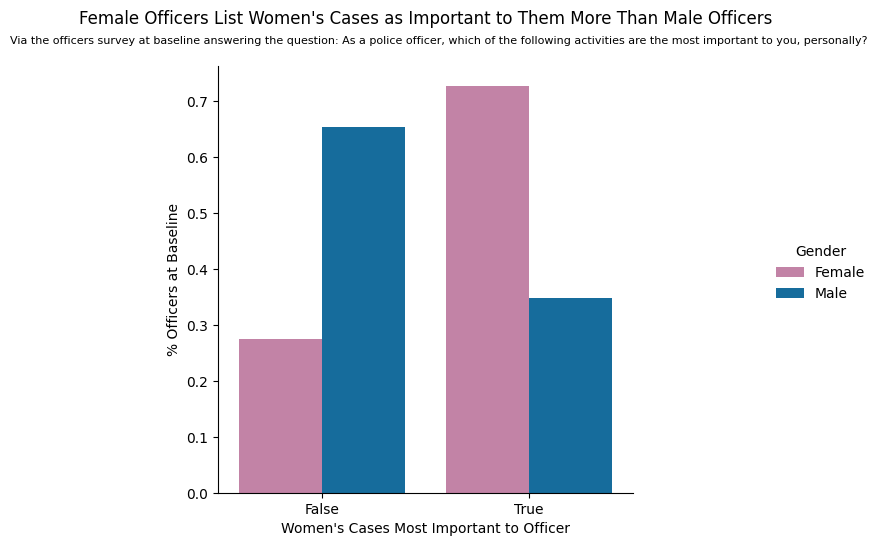

In [74]:
percents = baseline_police.groupby('gender')['b_pol_impt'].value_counts(normalize=True).reset_index()
percents['Gender']=percents['gender'].map({'m':'Male', 'f':'Female'})
g = sns.catplot(
    data=percents, kind="bar",
    x="b_pol_impt", y="proportion", hue="Gender", palette=dict(Female = '#cc79a7', Male = '#0072b2') # Chose colors from colorblind palette
)
_ = plt.xlabel("Women's Cases Most Important to Officer")
_ = plt.ylabel("% Officers at Baseline")
_ = plt.title("Female Officers List Women's Cases as Important to Them More Than Male Officers", y=1.08)
_ = plt.suptitle("Via the officers survey at baseline answering the question: As a police officer, which of the following activities are the most important to you, personally?", fontsize=8, y = 1.03)
plt.show()

I also considered use raw numbers instead of proportions for the charts. However, there is a very large difference in number of observations so it is more difficult to compare between genders.

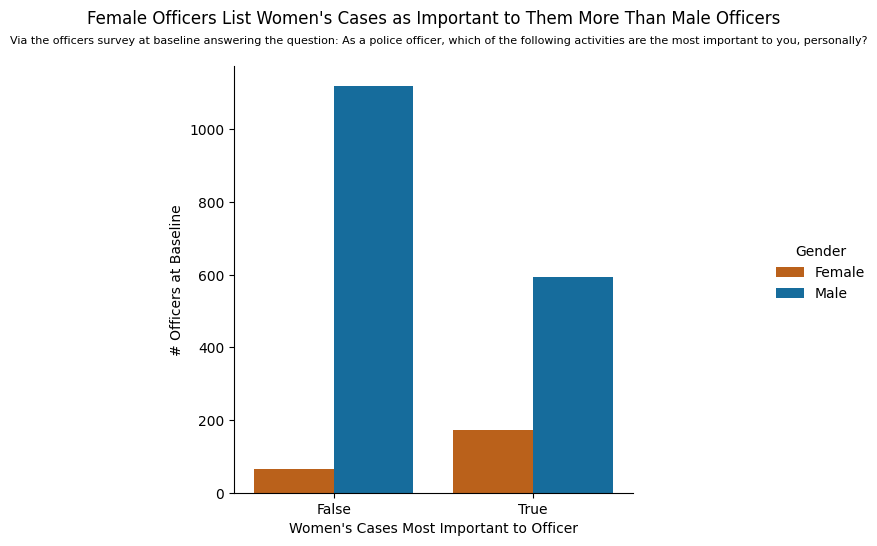

In [77]:
counts = baseline_police.groupby('gender')['b_pol_impt'].value_counts().reset_index()
counts['Gender']=percents['gender'].map({'m':'Male', 'f':'Female'})
g = sns.catplot(
    data=counts, kind="bar",
    x="b_pol_impt", y="count", hue="Gender", palette=dict(Female = '#d55e00', Male = '#0072b2') # Chose colors from colorblind palette
)
_ = plt.xlabel("Women's Cases Most Important to Officer")
_ = plt.ylabel("# Officers at Baseline")
_ = plt.title("Female Officers List Women's Cases as Important to Them More Than Male Officers", y=1.08)
_ = plt.suptitle("Via the officers survey at baseline answering the question: As a police officer, which of the following activities are the most important to you, personally?", fontsize=8, y = 1.03)
plt.show()

## Visualization 2: Perceived sensitivity baseline and endline:

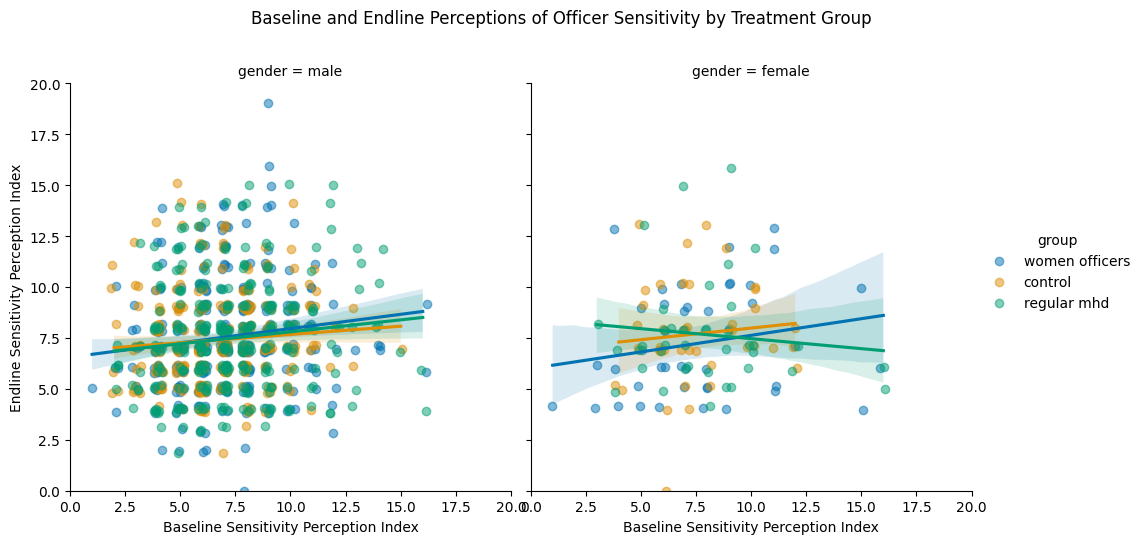

In [72]:
g = sns.lmplot(data=full_police, x='b_sensitivity', y='e_sensitivity', hue='group', col='gender', x_jitter = 0.2, y_jitter=0.2, scatter_kws={'alpha':0.5}, palette="colorblind")
g.fig.suptitle("Baseline and Endline Perceptions of Officer Sensitivity by Treatment Group", y=1.08)
#g.fig.suptitle("Via officer survey answers to the question: ", y=1, fontsize=10)
g.set_xlabels("Baseline Sensitivity Perception Index")
g.set_ylabels("Endline Sensitivity Perception Index")
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.show()

### Reasonings
- jittered the points and made alpha = 0.5 because there was a lot of overlap and wanted to be able to see density of points for all groups better
- chose just a descriptive title because there are not any overarching takeaways, there are a few smaller ones that can be observed though (eg: slope for regular help desk is positive for male officers but slightly negative for female officers - indicates this may be an interesting interaction to look into)

### Other options

The chart below is much simpler, not utilizing regression lines or separating by gender. I chose not to use it because it does not really give any insights - difficult to tell if there is any sort of trends.

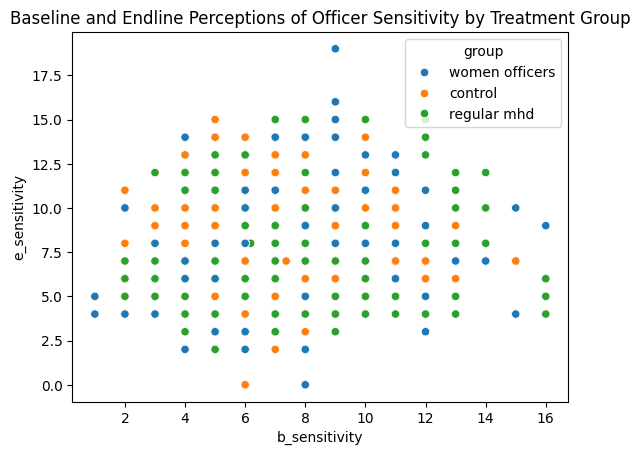

In [48]:
sns.scatterplot(data=full_police, x='b_sensitivity', y='e_sensitivity', hue='group')
plt.title("Baseline and Endline Perceptions of Officer Sensitivity by Treatment Group")
plt.show()

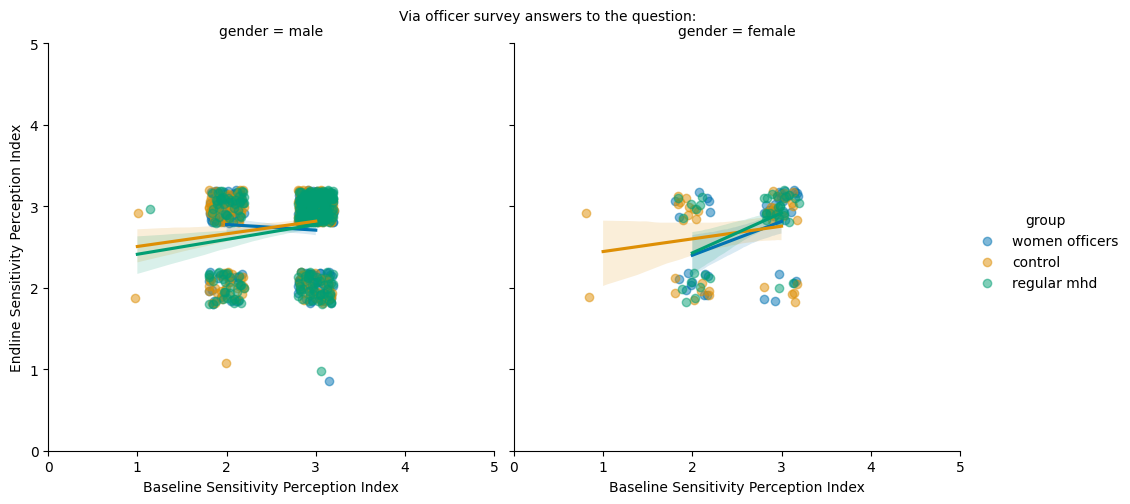

In [12]:
g = sns.lmplot(data=full_police, x='b_wcase_num', y='e_wcase_num', hue='group', col='gender', x_jitter = 0.2, y_jitter=0.2, scatter_kws={'alpha':0.5}, palette="colorblind")
g.fig.suptitle("Baseline and Endline Perceptions of Officer Sensitivity by Treatment Group", y=1.08)
g.fig.suptitle("Via officer survey answers to the question: ", y=1, fontsize=10)
g.set_xlabels("Baseline Sensitivity Perception Index")
g.set_ylabels("Endline Sensitivity Perception Index")
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()